In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/Vishal/Desktop/coaster_db.csv',encoding='latin')

In [3]:
df.head(3)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600Â ft (180Â m),6 mph (9.7 km/h),Coney Island,Removed,"JuneÂ 16,Â 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [4]:
df.shape

(1087, 56)

In [5]:
df.columns


Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Length                         953 non-null    object 
 2   Speed                          937 non-null    object 
 3   Location                       1087 non-null   object 
 4   Status                         874 non-null    object 
 5   Opening date                   837 non-null    object 
 6   Type                           1087 non-null   object 
 7   Manufacturer                   1028 non-null   object 
 8   Height restriction             831 non-null    object 
 9   Model                          744 non-null    object 
 10  Height                         965 non-null    object 
 11  Inversions                     932 non-null    float64
 12  Lift/launch system             795 non-null    o

In [7]:
df.select_dtypes(include='float64').columns

Index(['Inversions', 'latitude', 'longitude', 'speed1_value', 'speed_mph',
       'height_value', 'height_ft', 'Gforce_clean'],
      dtype='object')

In [8]:
df.select_dtypes(include='int64').columns

Index(['year_introduced', 'Inversions_clean'], dtype='object')

In [9]:
df.select_dtypes(include='float64').isna().sum()

Inversions      155
latitude        275
longitude       275
speed1_value    150
speed_mph       150
height_value    122
height_ft       916
Gforce_clean    725
dtype: int64

In [10]:
df.select_dtypes(include='int64').isna().sum()

year_introduced     0
Inversions_clean    0
dtype: int64

In [11]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


# Data Preparation

1. Dropping irrelivant Columns and Row
2. Identifying Duplicate Values
3. Renaming columns
4. Feature Creation

In [12]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [13]:
# Removing Columns
df = df[['coaster_name', #'Length', 'Speed', 
         'Location', #'Status', 'Opening date',
       #'Type',
         'Manufacturer',
         #'Height restriction', 'Model', 'Height',
       #'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       #'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       #'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       #'Track layout', 'Fastrack available', 'Soft opening date.1',
       #'Closing date', 'Opened', 'Replaced by', 'Website',
       #'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       #'Single rider line available', 'Restraint Style',
       #'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean',# 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', #'height_value', 'height_unit',
         'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

In [14]:
df.head(3)

,coaster_name,Location,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,LaMarcus Adna Thompson,1884,40.574,-73.978,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Lina Beecher,1895,40.578,-73.979,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",NaN,1896,41.580,-81.570,Other,NaN,NaN,NaN,0,NaN


In [15]:
df.shape

(1087, 12)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   coaster_name        1087 non-null   object 
 1   Location            1087 non-null   object 
 2   Manufacturer        1028 non-null   object 
 3   year_introduced     1087 non-null   int64  
 4   latitude            812 non-null    float64
 5   longitude           812 non-null    float64
 6   Type_Main           1087 non-null   object 
 7   opening_date_clean  837 non-null    object 
 8   speed_mph           937 non-null    float64
 9   height_ft           171 non-null    float64
 10  Inversions_clean    1087 non-null   int64  
 11  Gforce_clean        362 non-null    float64
dtypes: float64(5), int64(2), object(5)
memory usage: 102.0+ KB


In [17]:
# Changing Format
df['opening_date_clean']=pd.to_datetime(df['opening_date_clean'])

In [18]:
df.head(2)

,coaster_name,Location,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,LaMarcus Adna Thompson,1884,40.574,-73.978,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Lina Beecher,1895,40.578,-73.979,Wood,1895-01-01,NaN,NaN,1,12.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   coaster_name        1087 non-null   object        
 1   Location            1087 non-null   object        
 2   Manufacturer        1028 non-null   object        
 3   year_introduced     1087 non-null   int64         
 4   latitude            812 non-null    float64       
 5   longitude           812 non-null    float64       
 6   Type_Main           1087 non-null   object        
 7   opening_date_clean  837 non-null    datetime64[ns]
 8   speed_mph           937 non-null    float64       
 9   height_ft           171 non-null    float64       
 10  Inversions_clean    1087 non-null   int64         
 11  Gforce_clean        362 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 102.0+ KB


In [20]:
df.columns

Index(['coaster_name', 'Location', 'Manufacturer', 'year_introduced',
       'latitude', 'longitude', 'Type_Main', 'opening_date_clean', 'speed_mph',
       'height_ft', 'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [21]:
# Renaming columns
df = df.rename(columns={'coaster_name':'Coaster_Name','year_introduced':'Year_Introduced',
       'opening_date_clean':'Opening_Date', 'speed_mph':'Speed_mph',
        'Inversions_clean':'Inversion', 'Gforce_clean':'Gforce'})


In [22]:
df.columns

Index(['Coaster_Name', 'Location', 'Manufacturer', 'Year_Introduced',
       'latitude', 'longitude', 'Type_Main', 'Opening_Date', 'Speed_mph',
       'height_ft', 'Inversion', 'Gforce'],
      dtype='object')

In [23]:
df.isnull().sum()

Coaster_Name         0
Location             0
Manufacturer        59
Year_Introduced      0
latitude           275
longitude          275
Type_Main            0
Opening_Date       250
Speed_mph          150
height_ft          916
Inversion            0
Gforce             725
dtype: int64

In [24]:
# Finding Duplicate Row

In [25]:
df[df.duplicated()]

,Coaster_Name,Location,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,height_ft,Inversion,Gforce


In [26]:
# Finding Duplicate coaster_Name
df[df.duplicated(subset=['Coaster_Name'])]

,Coaster_Name,Location,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,height_ft,Inversion,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Zamperla,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Allan Herschell Company,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaT,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7


In [27]:
# Checking an Example Duplicate
df.query("Coaster_Name == 'Crystal Beach Cyclone'")

,Coaster_Name,Location,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,height_ft,Inversion,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [28]:
df =df.loc[~df.duplicated(subset=['Coaster_Name','Location','Opening_Date'])].reset_index(drop=True)

In [29]:
df.shape

(990, 12)

In [30]:
df.head()

,Coaster_Name,Location,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,height_ft,Inversion,Gforce
0,Switchback Railway,Coney Island,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [31]:
# Checking an Example Duplicate
df.query("Coaster_Name == 'Crystal Beach Cyclone'")

,Coaster_Name,Location,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,height_ft,Inversion,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [32]:
# Finding Duplicate coaster_Name
df[df.duplicated(subset=['Coaster_Name'])]

,Coaster_Name,Location,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,height_ft,Inversion,Gforce


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Coaster_Name     990 non-null    object        
 1   Location         990 non-null    object        
 2   Manufacturer     932 non-null    object        
 3   Year_Introduced  990 non-null    int64         
 4   latitude         783 non-null    float64       
 5   longitude        783 non-null    float64       
 6   Type_Main        990 non-null    object        
 7   Opening_Date     807 non-null    datetime64[ns]
 8   Speed_mph        850 non-null    float64       
 9   height_ft        159 non-null    float64       
 10  Inversion        990 non-null    int64         
 11  Gforce           324 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 92.9+ KB


In [34]:
df.isnull().sum()

Coaster_Name         0
Location             0
Manufacturer        58
Year_Introduced      0
latitude           207
longitude          207
Type_Main            0
Opening_Date       183
Speed_mph          140
height_ft          831
Inversion            0
Gforce             666
dtype: int64

# Feature Understanding
1. Plotting feature Distribution
   . Histogram
   . KDE
   . BOxplot  

In [35]:
df['Year_Introduced'].value_counts()

Year_Introduced
1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: count, Length: 101, dtype: int64

In [36]:
myplot = df['Year_Introduced'].value_counts().head(10)

<Axes: title={'center': 'TOP 10 Year Coasters Introducted'}, xlabel='Year_Introduced'>

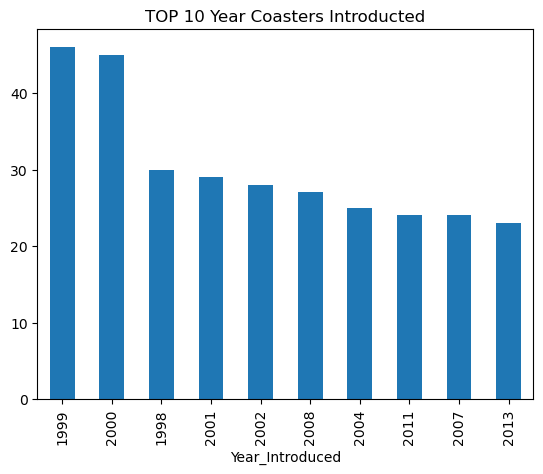

In [37]:
myplot.plot(kind='bar',title='TOP 10 Year Coasters Introducted')

In [38]:
df.columns

Index(['Coaster_Name', 'Location', 'Manufacturer', 'Year_Introduced',
       'latitude', 'longitude', 'Type_Main', 'Opening_Date', 'Speed_mph',
       'height_ft', 'Inversion', 'Gforce'],
      dtype='object')

In [39]:
df['Speed_mph'].head()

0    6.0
1    NaN
2    NaN
3    NaN
4    NaN
Name: Speed_mph, dtype: float64

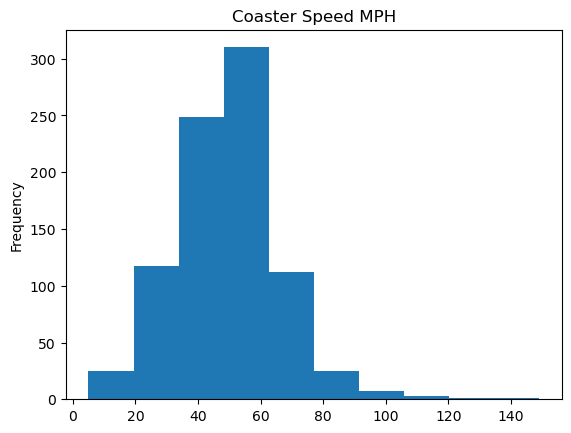

In [40]:
myhistplot = df['Speed_mph'].plot(kind='hist',title='Coaster Speed MPH')

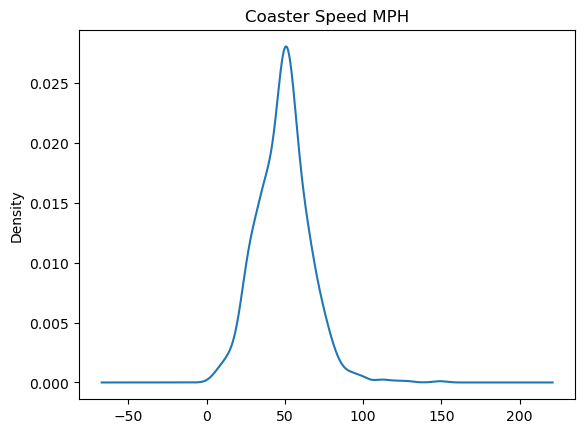

In [41]:
myhistplot = df['Speed_mph'].plot(kind='kde',title='Coaster Speed MPH')

In [42]:
df['Type_Main'].value_counts()

Type_Main
Steel    728
Wood     191
Other     71
Name: count, dtype: int64

In [43]:
myplot = df['Type_Main'].value_counts()

<Axes: title={'center': 'Types_main Introducted'}, xlabel='Type_Main'>

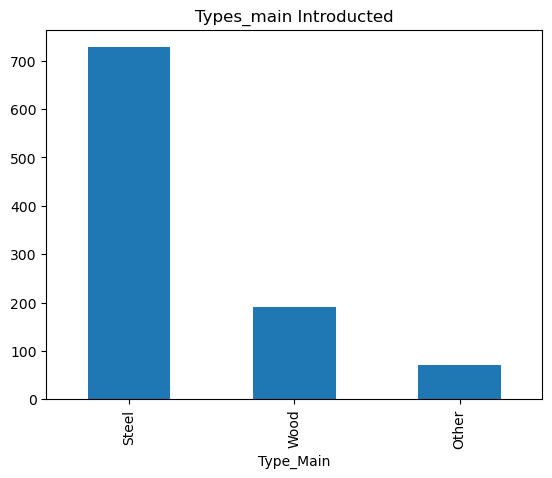

In [44]:
myplot.plot(kind='bar',title='Types_main Introducted')

<Axes: title={'center': 'Types_main Introducted'}, ylabel='Frequency'>

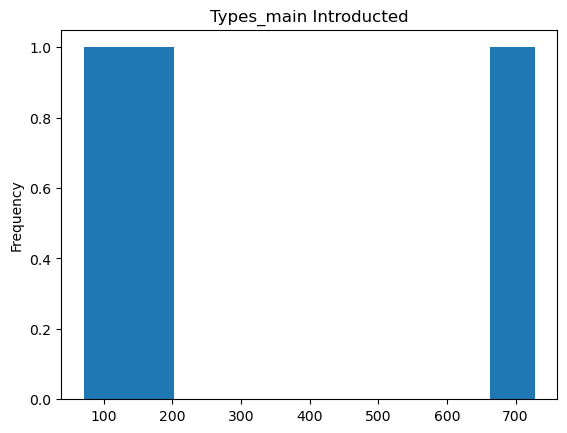

In [45]:
myplot.plot(kind='hist',title='Types_main Introducted')

<Axes: title={'center': 'Types_main Introducted'}, ylabel='Density'>

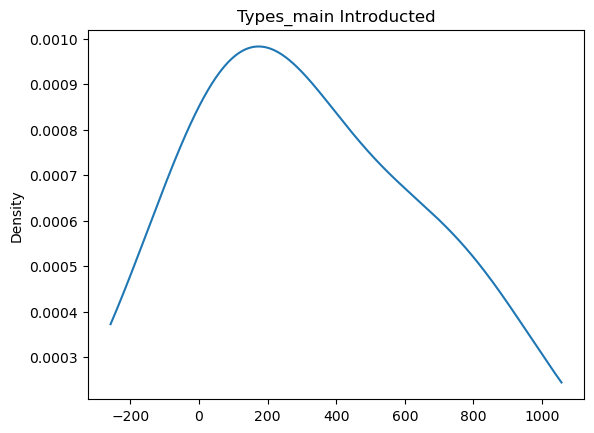

In [46]:
myplot.plot(kind='kde',title='Types_main Introducted')

# Feature Relationship
1. Scratterploy
2. Heatmap Correlation
3. Pairplkot
4. Groupby Comparisons

In [47]:
df.columns

Index(['Coaster_Name', 'Location', 'Manufacturer', 'Year_Introduced',
       'latitude', 'longitude', 'Type_Main', 'Opening_Date', 'Speed_mph',
       'height_ft', 'Inversion', 'Gforce'],
      dtype='object')

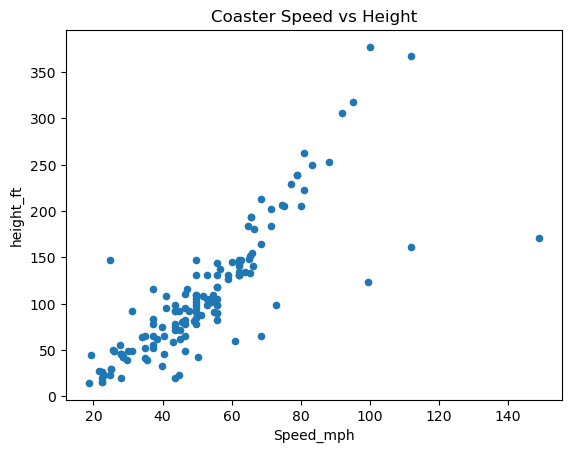

In [48]:
df.plot(kind='scatter',x='Speed_mph',y ='height_ft',title='Coaster Speed vs Height')
plt.show()

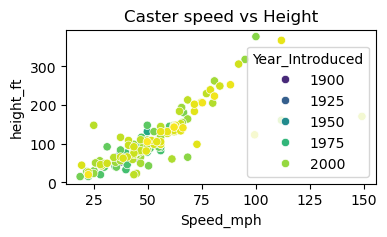

In [64]:
plt.figure(figsize=(4,2))
sns.scatterplot(x='Speed_mph',y ='height_ft',data =df,hue='Year_Introduced',palette='viridis')
plt.title('Caster speed vs Height')
plt.show()

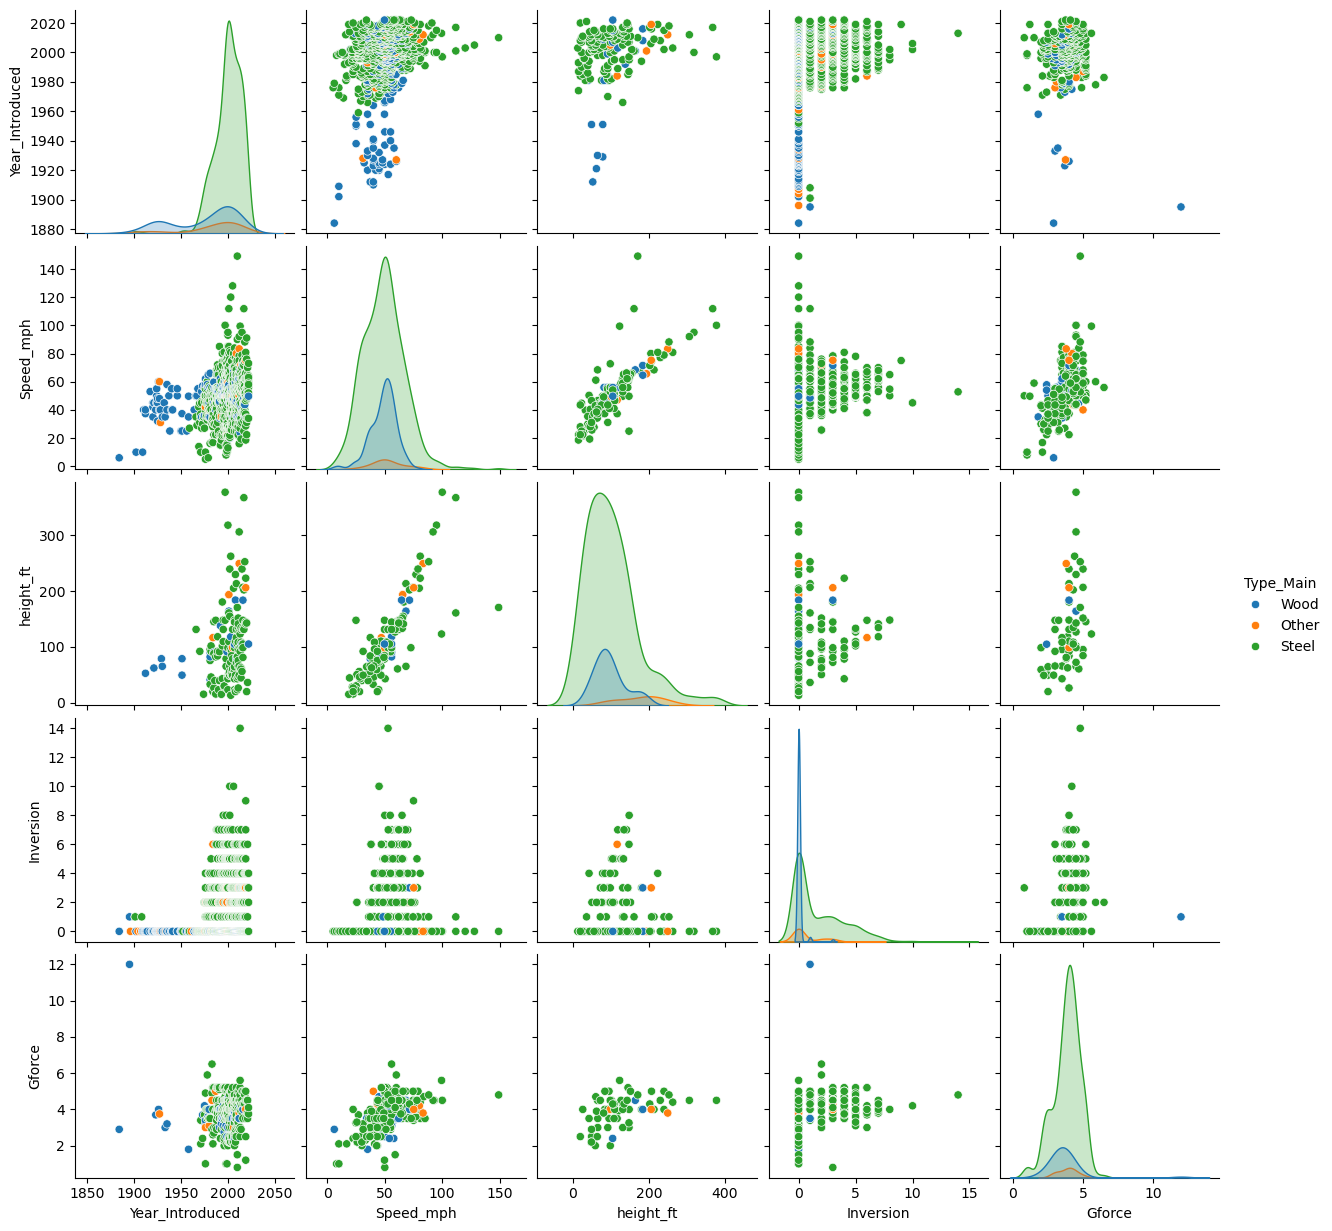

In [57]:
sns.pairplot(df, vars=['Year_Introduced','Speed_mph',
       'height_ft', 'Inversion', 'Gforce'],hue='Type_Main')
plt.show()

In [65]:
df_corr = df[['Year_Introduced','Speed_mph',
       'height_ft', 'Inversion', 'Gforce']].dropna().corr()

In [66]:
df_corr

,Year_Introduced,Speed_mph,height_ft,Inversion,Gforce
Year_Introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
Speed_mph,0.171978,1.000000,0.733999,-0.028705,0.607383
height_ft,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversion,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce,0.160247,0.607383,0.466482,0.275991,1.000000


<Axes: >

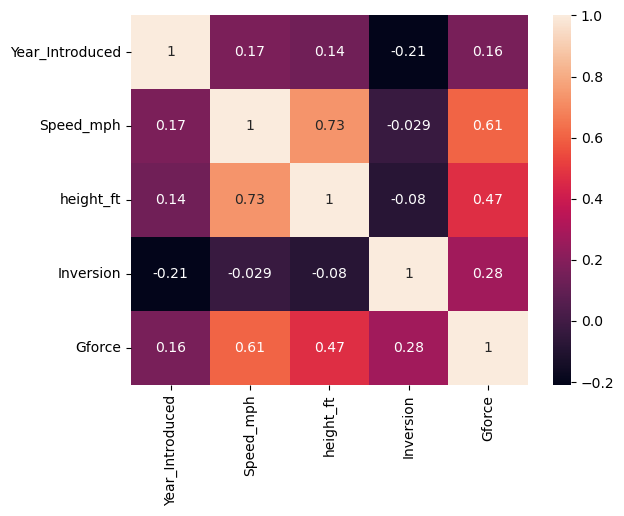

In [67]:
sns.heatmap(df_corr,annot=True)

# Question:-
find top 10 location with Average Speed with bharplot